# TASK 1 : Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# TASK 2 : Clone & Explore dataset

In [ ]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 17.69 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
#set the path to the main dir
import os
main_dir = "/content/datasets/Data"

#set the path to the train dir
train_dir = os.path.join(main_dir, 'train')

#set the path to the test dir
test_dir = os.path.join(main_dir, 'test')


#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')

#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')
#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, 'COVID19')
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [ ]:
#print the filenames
train_covid_names =os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names =os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names =os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names =os.listdir(test_normal_dir)
print(test_normal_names[:10])


['COVID19(27).jpg', 'COVID19(32).jpg', 'COVID19(536).jpg', 'COVID19(397).jpg', 'COVID19(424).jpg', 'COVID19(134).jpg', 'COVID19(348).jpg', 'COVID19(133).jpg', 'COVID19(19).jpg', 'COVID-19 (342).jpg']
['NORMAL(1142).jpg', 'NORMAL(549).jpg', 'NORMAL(1140).jpg', 'NORMAL(688).jpg', 'NORMAL(640).jpg', 'NORMAL(32).jpg', 'NORMAL(902).jpg', 'NORMAL(573).jpg', 'NORMAL(596).jpg', 'NORMAL(366).jpg']
['COVID19(218).jpg', 'COVID19(124).jpg', 'COVID19(512).jpg', 'COVID19(36).jpg', 'COVID19(186).jpg', 'COVID-19 (540).jpg', 'COVID-19 (863).jpg', 'COVID19(70).jpg', 'COVID-19 (457).jpg', 'COVID19(521).jpg']
['NORMAL(199).jpg', 'NORMAL(1175).jpg', 'NORMAL(1359).jpg', 'NORMAL(1431).jpg', 'NORMAL(1333).jpg', 'NORMAL(1520).jpg', 'NORMAL(471).jpg', 'NORMAL(9).jpg', 'NORMAL(455).jpg', 'NORMAL(1327).jpg']


In [ ]:
#print the total no of images present in each dir
print("Total images present in the training set :",len(train_covid_names+train_normal_names))
print("Total images present in the testing set :", len(test_covid_names+test_normal_names))


Total images present in the training set : 1811
Total images present in the testing set : 484


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(27).jpg', '/content/datasets/Data/train/COVID19/COVID19(32).jpg', '/content/datasets/Data/train/COVID19/COVID19(536).jpg', '/content/datasets/Data/train/COVID19/COVID19(397).jpg', '/content/datasets/Data/train/COVID19/COVID19(424).jpg', '/content/datasets/Data/train/COVID19/COVID19(134).jpg', '/content/datasets/Data/train/COVID19/COVID19(348).jpg', '/content/datasets/Data/train/COVID19/COVID19(133).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1142).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(549).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1140).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(688).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(640).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(32).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(902).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(573).jpg']


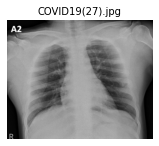

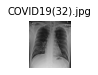

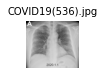

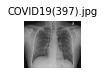

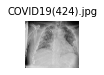

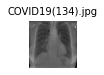

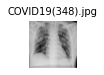

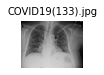

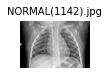

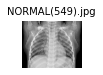

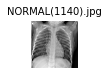

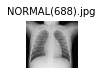

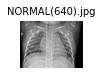

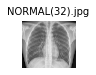

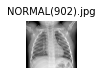

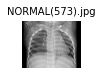

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir,filename)for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir,filename)for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
merged_list = covid_pic+normal_pic
for i , img_path in enumerate(merged_list):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(rows, cols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

  plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [ ]:
# generate training,testing and validation batches  
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale = 1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the image shape
train_generator.image_shape
#3 = rgb
#1 = grayscale

(150, 150, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [ ]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5), padding='SAME',activation='relu', input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5), padding='SAME',activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer: 2D to 1D
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

# TASK 6 : Compile & Train the Model

In [ ]:
#compile the model
model.compile(Adam(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#train the model
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data =  validation_generator)

Epoch 1/30
46/46 [==============================] - 54s 978ms/step - loss: 1.1133 - accuracy: 0.7854 - val_loss: 0.3282 - val_accuracy: 0.9448
Epoch 2/30
46/46 [==============================] - 48s 1s/step - loss: 0.2057 - accuracy: 0.9255 - val_loss: 0.1611 - val_accuracy: 0.9558
Epoch 3/30
46/46 [==============================] - 45s 987ms/step - loss: 0.1497 - accuracy: 0.9455 - val_loss: 0.1458 - val_accuracy: 0.9503
Epoch 4/30
46/46 [==============================] - 45s 987ms/step - loss: 0.1768 - accuracy: 0.9406 - val_loss: 0.2317 - val_accuracy: 0.9420
Epoch 5/30
46/46 [==============================] - 46s 1s/step - loss: 0.1489 - accuracy: 0.9510 - val_loss: 0.1359 - val_accuracy: 0.9448
Epoch 6/30
46/46 [==============================] - 48s 1s/step - loss: 0.1433 - accuracy: 0.9531 - val_loss: 0.1330 - val_accuracy: 0.9530
Epoch 7/30
46/46 [==============================] - 45s 987ms/step - loss: 0.1312 - accuracy: 0.9586 - val_loss: 0.1805 - val_accuracy: 0.9558
Epoch 8/

# TASK 7 : Performance Evaluation

In [ ]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

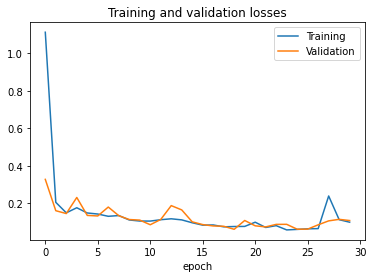

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

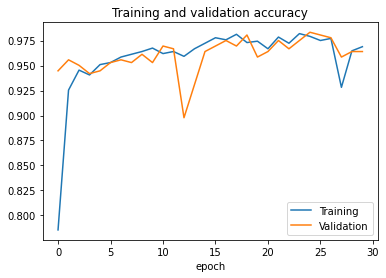

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
# get the test acuarcy and loss
test_loss , test_acc = model.evaluate(test_generator)
print('test loss :{} test acc :{}'.format(test_loss,test_acc))

16/16 [==============================] - 10s 607ms/step - loss: 0.1006 - accuracy: 0.9711
test loss :0.10063444823026657 test acc :0.9710744023323059


# TASK 8 : Prediction On New Data

In [ ]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename
  img  = tensorflow.keras.utils.load_img(img_path, target_size = (150,150))
  images = tensorflow.keras.utils.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print(filename)
  if prediction == 0:
    print('COVID detected')
  else:
    print('Your report is normal')

Saving Chest.jpeg to Chest (2).jpeg
1/1 [==============================] - 0s 15ms/step
Chest.jpeg
COVID detected


In [ ]:
import pickle

In [ ]:
filename = 'CovidXR.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('CovidXR.sav', 'rb'))

In [ ]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename
  img  = tensorflow.keras.utils.load_img(img_path, target_size = (150,150))
  images = tensorflow.keras.utils.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = loaded_model.predict(images)
  print(filename)
  if prediction == 0:
    print('COVID detected')
  else:
    print('Your report is normal')

Saving Chest.jpeg to Chest (3).jpeg
1/1 [==============================] - 0s 85ms/step
Chest.jpeg
COVID detected
